# Proyecto Métodos estadísticos bayesianos.

### Método de Mezclas gausseanas para un caso real.

* El dataset consta de vectores de características que pertenecen a 12,330 sesiones.


* El dataset se formó para que cada sesión pertenecería a un usuario diferente en un período de 1 año para evitar cualquier tendencia a una campaña específica, día especial, usuario perfil o período.

El conjunto de datos consta de 10 atributos numéricos y 8 categóricos.
El atributo 'Revenue' se puede utilizar como etiqueta de clase.

* "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" y "Product Related Duration" representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total invertido en cada uno de estas categorías de página.  Los valores de estas características se derivan de la información URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando un usuario realiza una acción, p. Ej. pasar de una página a otra.

* Las funciones "Bounce Rate", "Exit Rate" y "Page Value" representan las métricas medidas por "Google Analytics" para cada página del sitio de comercio electrónico. 

* El valor de la función "Tasa de rebote" para una página web se refiere al porcentaje de visitantes que ingresan al sitio desde esa página y luego se van ("rebotan") sin activar ninguna otra solicitud al servidor de análisis durante esa sesión. 

* El valor de la función "Bounce Rate" para una página web específica se calcula como para todas las páginas vistas a la página, el porcentaje que fue el último en la sesión. 

* La función "Page Value" representa el valor promedio de una página web que un usuario visitó antes de completar una transacción de comercio electrónico.

* La función "Special Day" indica la proximidad del tiempo de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, el Día de San Valentín) en el que es más probable que las sesiones finalicen con la transacción. El valor de este atributo se determina considerando la dinámica del comercio electrónico como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para el día de Valentina, este valor toma un valor distinto de cero entre el 2 de febrero y el 12 de febrero, cero antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero. 

El conjunto de datos también incluye operaciones sistema, navegador, región, tipo de tráfico, tipo de visitante como visitante recurrente o nuevo, un valor booleano que indica si la fecha de la visita es el fin de semana y el mes del año.

In [21]:
# Importamos librerías
from sklearn.datasets import load_sample_image
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import Normalizer
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('online_shoppers_intention.csv')
data2 = data.copy()
dataCopy = data.copy()

In [3]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


#### Tratamiento de variables categóricas  por codificación lineal

In [4]:
c = ['VisitorType','Weekend','Revenue']
for i in c:
    varOrd = dataCopy[i].unique()
    n=len(varOrd)
    m=n-1 if n%2==0 else int((n-1)/2)
    st = 1
    x=range(m-1,2*m+2,st)
    # Codificación lineal
    dM={k:i for i,k in zip(x,varOrd)}
    dataCopy[i]=data[i].map(dM)

In [5]:
varOrd = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
n=len(varOrd)
m = n-1 if n%2==0 else int((n-1)/2)
st = 1
x = range(1,m+2,st)
dM={k:i for i,k in zip(x,varOrd)}
dataCopy['Month'] = data['Month'].map(dM)

In [6]:
dataCopy

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,0,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,0,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,0,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,0,0,0


In [7]:
dataCopy.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object

In [8]:
nulos = pd.DataFrame(dataCopy.isnull().sum(),columns=['Valores_Nulos'])
nulos

,Valores_Nulos
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


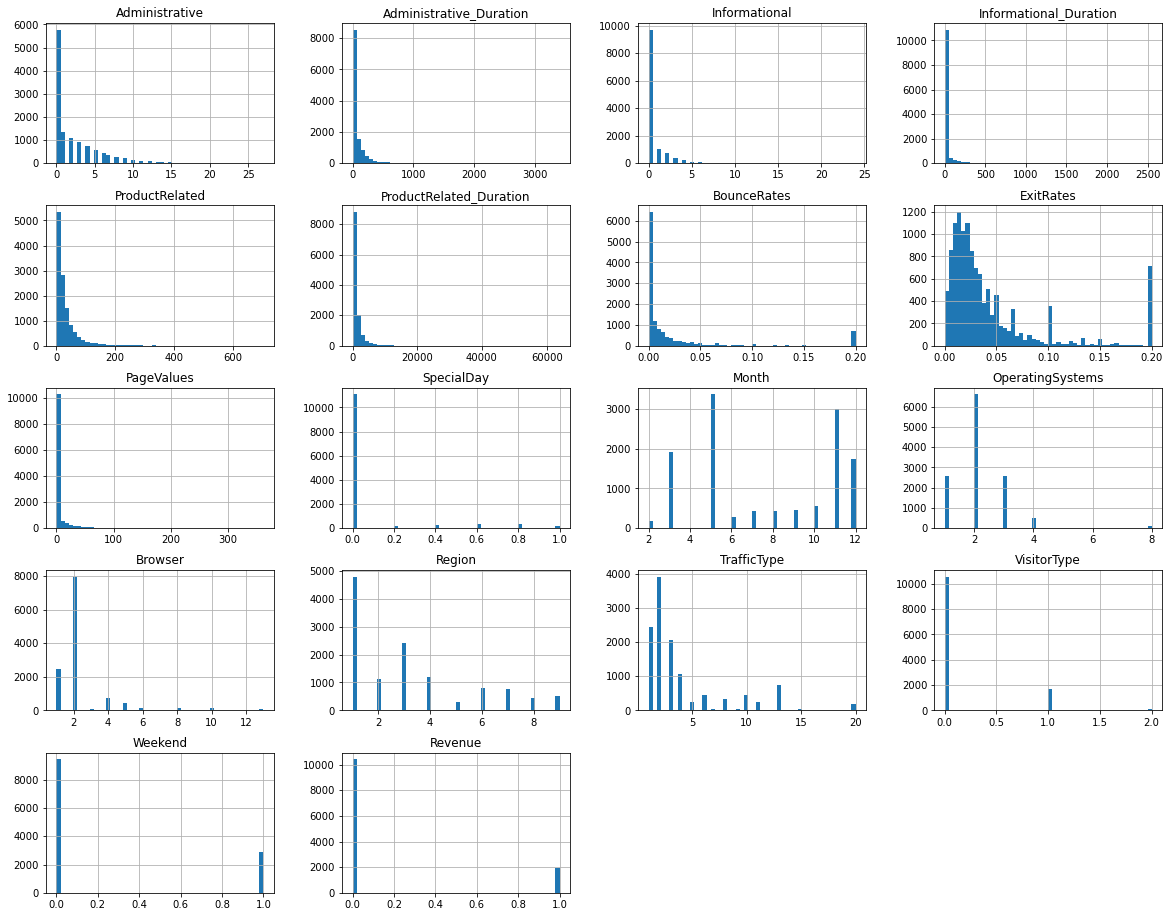

In [9]:
hist=dataCopy.hist(bins=50, figsize=([20,16]))

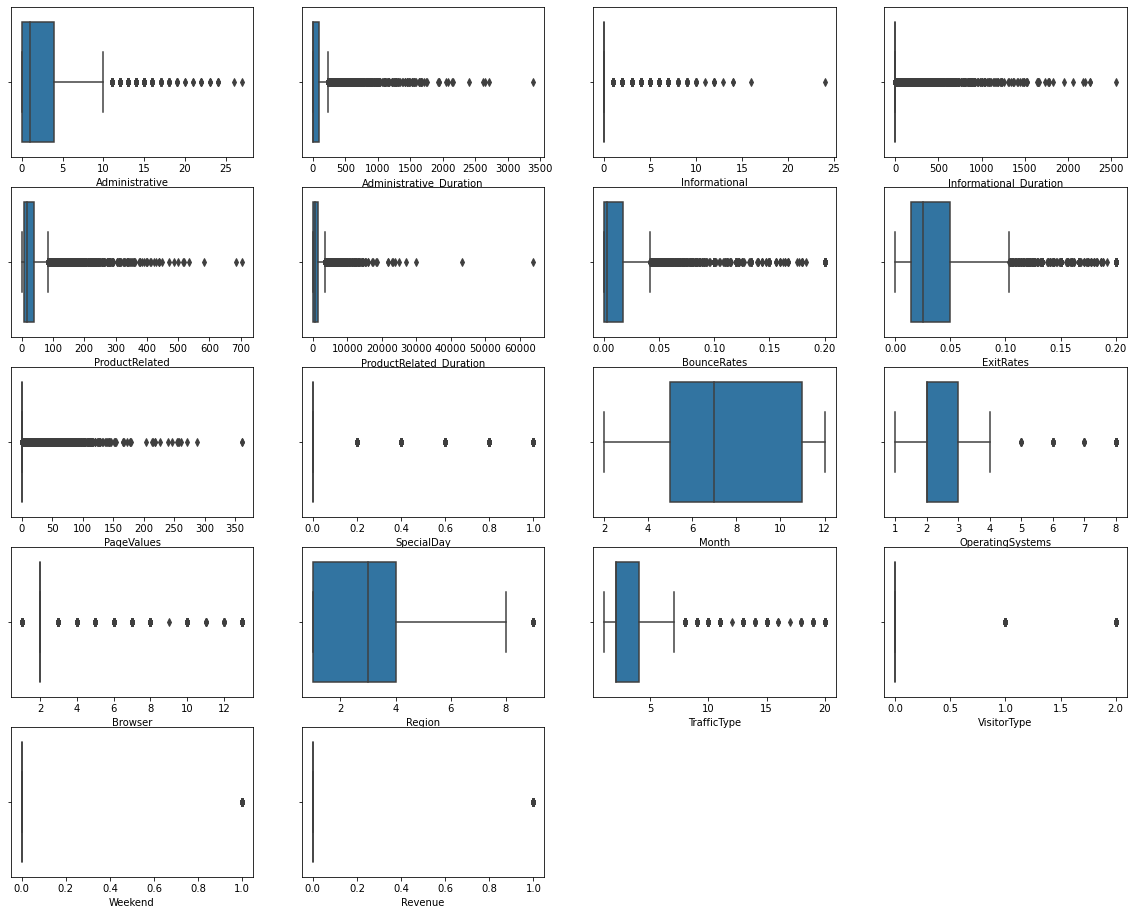

In [10]:
c=['Administrative','Administrative_Duration','Informational','Informational_Duration',
   'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues',
   'SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType',
   'Weekend','Revenue']
plt.figure(figsize=(20,16))
for i in range(1, 19):
    plt.subplot(5,4,i)
    i=i-1
    sns.boxplot(dataCopy[c[i]])

Al tener tener variables tan diferentes y con muchísimos datos atípicos, se tienen que normalizar todas las variables.

# Modelo

In [11]:
dat=dataCopy.copy()
data_norm=Normalizer().fit_transform(dat)

In [12]:
X_train, X_test = train_test_split(data_norm, test_size=0.2)

In [13]:
def log_likelihood_gmm(X, mu, sigma, pi):
    """
    Log-likelihood of the data wrt Gaussian Mixture Model.
    :param data: Data.
    :param mu: Means of the components of the GMM.
    :param sigma: Covariances of the components of the GMM.
    :param pi: Weights of the components of the GMM.
    :return: Log-likelihood of the data wrt GMM.
    """
    # Number of clusters
    k = mu.shape[0]
    # Number of points
    N = X.shape[0]
    
    # Individual likelihood of each point to each normal
    ind_likelihood = np.zeros((N, k))
    for j in range(k):
        ind_likelihood[:, j] = multivariate_normal.pdf(X, mean=mu[j, :], cov=sigma[j, :, :])
    
    # Log likelihood
    log_likelihood = np.log(ind_likelihood.dot(pi)).mean()
        
    return log_likelihood

In [16]:
log_likelihood_train = []
log_likelihood_test = []

for k in range(5, 101):
    # Instanciamos el algoritmo
    gmm = GaussianMixture(n_components=k)
    
    # Entrenamos
    gmm.fit(X=X_train)
    pi = gmm.weights_
    mu = gmm.means_
    sigma = gmm.covariances_
    
    # Métrica con datos de entrenamiento
    log_likelihood_train.append(log_likelihood_gmm(X_train, mu, sigma, pi))
    # Métrica con datos de prueba
    log_likelihood_test.append(log_likelihood_gmm(X_test, mu, sigma, pi))

(4.0, 28.0, 70.0, 85.0)

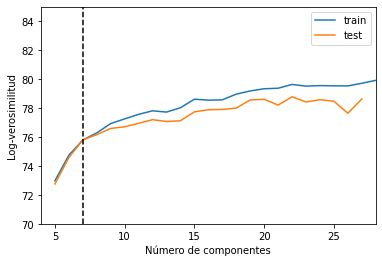

In [26]:
plt.plot(range(5, 101), log_likelihood_train, label="train")
plt.plot(range(5, 101), log_likelihood_test, label="test")
plt.axvline(x=7, ls="--", color="k")
plt.legend()
plt.xlabel("Número de componentes")
plt.ylabel("Log-verosimilitud")
plt.axis([4, 28, 70, 85])

In [18]:
# Definir el número de colores finales (número de componentes de la mezcla Gaussiana)
n = 7
# Instanciar y entrenar el modelo
gmm_64 = GaussianMixture(n_components=n).fit(X_train)

labels = gmm_64.predict(data_norm)

In [19]:
dataCopy['labels'] = labels

#### Algunas visualizaciones

Text(0, 0.5, 'BounceRates')

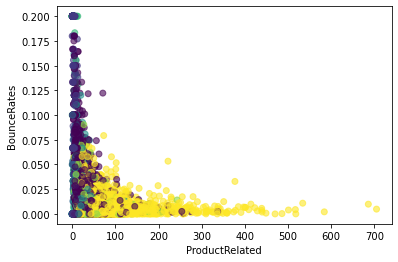

In [20]:
a, b = dataCopy["ProductRelated"], data["BounceRates"]
plt.scatter(a, b, c=dataCopy['labels'], alpha=0.6)
plt.xlabel(a.name)
plt.ylabel(b.name)

Text(0, 0.5, 'BounceRates')

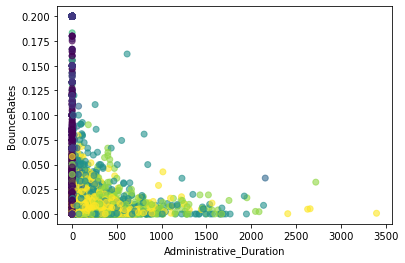

In [24]:
a, b = dataCopy["Administrative_Duration"], data["BounceRates"]
plt.scatter(a, b, c=dataCopy['labels'], alpha=0.6)
plt.xlabel(a.name)
plt.ylabel(b.name)

Text(0, 0.5, 'ProductRelated_Duration')

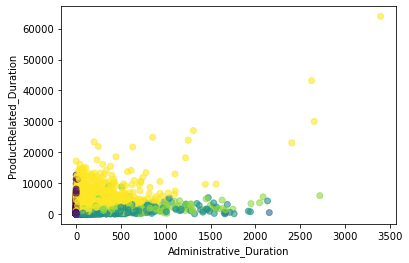

In [29]:
a, b = dataCopy["Administrative_Duration"], data["ProductRelated_Duration"]
plt.scatter(a, b, c=dataCopy['labels'], alpha=0.6)
plt.xlabel(a.name)
plt.ylabel(b.name)

#### PCA con variables más importantes.

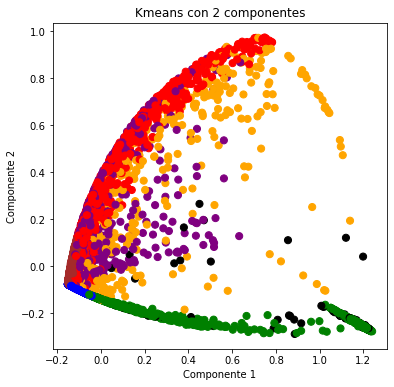

In [23]:
pca=PCA(n_components=2)
pca_data=pca.fit_transform(data_norm)

pca_data_df=pd.DataFrame(data=pca_data, columns=['Componente_1','Componente_2'])
pca_nombres=pd.concat([pca_data_df, dataCopy[['labels']]], axis=1)

fig= plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title('Kmeans con 2 componentes')
color= np.array(['blue','green','orange','red','black','purple', 'brown'])
ax.scatter(x=pca_nombres['Componente_1'], y=pca_nombres['Componente_2'], c = color[pca_nombres['labels']], s=50)

plt.show()

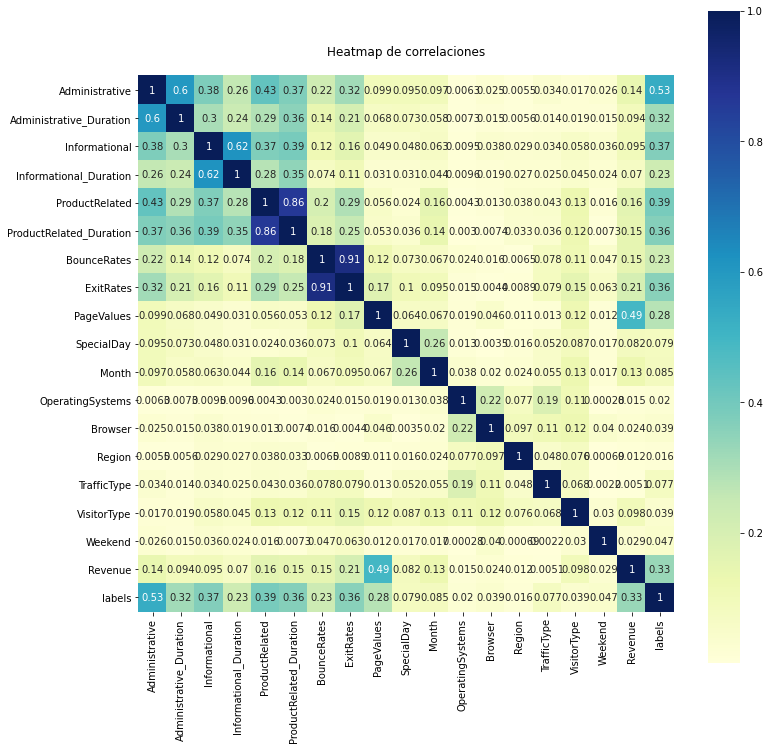

In [27]:
correlations=dataCopy.corr().abs()
plt.figure(figsize=(12,12))
ax=sns.heatmap(correlations, square=True, cmap="YlGnBu", annot=True)
ax.set_title('Heatmap de correlaciones')
ax.set_ylim(len(correlations),-0.5)
plt.show()

## Análisis de los grupos.

In [49]:
dataCopy[['Administrative', 'Administrative_Duration', 'Informational','ProductRelated', 
          'ProductRelated_Duration','ExitRates', 'labels']].groupby(['labels']).mean()

,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,ExitRates
labels,,,,,,
0,0.024316,0.045846,0.020171,21.564244,830.269192,0.042967
1,0.000000,0.000000,0.000000,2.791192,25.610706,0.137521
2,2.312155,49.734176,0.505525,5.320442,84.812989,0.040674
3,3.912034,174.358859,0.029322,16.488699,445.624008,0.025236
4,0.264368,0.505364,0.074713,2.632184,10.408238,0.162103
5,4.326923,198.351855,1.747781,27.343195,914.525380,0.021778
6,3.959938,109.754119,0.912122,62.855518,2505.636918,0.020881


In [52]:
dataCopy[['Administrative', 'Administrative_Duration', 'Informational','ProductRelated', 
          'ProductRelated_Duration','ExitRates', 'labels']].groupby(['labels']).max()

,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,ExitRates
labels,,,,,,
0,2,15.750000,2,337,12634.620890,0.186667
1,0,0.000000,0,17,242.500000,0.200000
2,15,2156.166667,6,44,784.883333,0.150000
3,18,2137.112745,5,207,5293.824709,0.130952
4,2,15.000000,2,14,101.000000,0.200000
5,24,2720.500000,16,243,8981.580128,0.122427
6,27,3398.750000,24,705,63973.522230,0.125000


In [51]:
dataCopy[['Revenue', 'labels']].groupby(['labels']).sum()

,Revenue
labels,
0,112
1,0
2,123
3,64
4,5
5,536
6,1068


A partir de estos datos podemos observar algunas cosas interesantes, la primera siendo que tanto el grupo 1, como el grupo 4 nos generan poca ganancia, siendo las personas que pasan menos tiempo en las paginas y las que salen más. El grupo 6 que es el que mayor ganancia nos genera pasa menos tiempo en las paginas administrativas y de informacion y mucho mas tiempo en las paginas de prooductos que el grupo 5, que genera cerca de la mitad que el grupo 6. Finalmente, el grupo 0 y 2 que generan una cantidad similar de ganancias, podemos observar que tienen discrepancias similares a las de los grupos 5 y 6, un grupo pasa mas tiempo en las paginas administrativas y de informacion, y el otro grupo pasa mas tiempo en las paginas de productos

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created by Paulo Adrián Villa Domínguez and Rafael Gallardo Vazquez.
</footer>